## 모델의 성능 향상시키기
### 1. 학습셋, 테스트셋, 검증셋

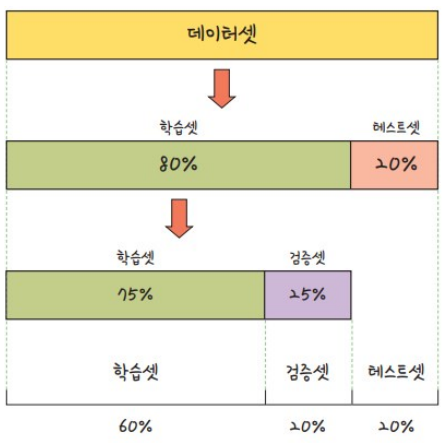

- 학습이 끝난 모델을 테스트해보는 것이 테스트셋의 목적이라면, 최적의 학습 파라미터를 찾기 위해 학습 과정에서 사용하는 것이 검증셋
- 검증셋을 설정하면 검증셋에 테스트한 결과를 추적하면서 최적의 모델을 만들 수 있다.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('../data/wine.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


* 0 : 주석산 농도
* 1 : 아세트산 농도
* 2 : 구연산 농도
* 3 : 잔류 당분 농도
* 4 : 염화나트륨 농도
* 5 : 유리 아황산 농도
* 6 : 총 아황산 농도
* 7 : 밀도
* 8 : pH
* 9 : 황산칼륨 농도
* 10 : 알코올 도수
* 11 : 와인의 맛(0~10등급)
* 12 : 클래스 (1 : 레드와인, 0 : 화이트와인)

In [2]:
# 와인의 속성을 X, 분류를 y
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋을 나눈다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [3]:
# 모델 구조 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행
history = model.fit(X_train, y_train, epochs = 50, batch_size = 500, validation_split = 0.25)   # 0.8 * 0.25 = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 1s 41ms/step - loss: 5.8719 - accuracy: 0.1304 - val_loss: 2.5047 - val_accuracy: 0.2454
Epoch 2/50
8/8 [===

In [4]:
# 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy : ', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.9485
Test accuracy :  0.9484615325927734


### 2. 모델 업데이트하기
- 에포크마다 정확도를 함께 기록하면서 저장하는 방법을 알아보자
#### 0. 기본코드 불러오기

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/wine.csv', header = None)

# 와인의 속성을 X, 분류를 y
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋을 나눈다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

# 모델 구조 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 1. 모델의 저장 설정 및 실행

In [7]:
# 모델 저장의 조건 설정
modelpath = '../data/model/wine_all/{epoch:02d}--{val_accuracy:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath = modelpath, verbose = 1)

# 모델의 실행
history = model.fit(X_train, y_train, epochs = 50, batch_size = 500, validation_split = 0.25, verbose = 0, callbacks = [checkpoint])


Epoch 1: saving model to ../data/model/wine_all\01--0.8846.hdf5

Epoch 2: saving model to ../data/model/wine_all\02--0.9031.hdf5


c:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to ../data/model/wine_all\03--0.9100.hdf5

Epoch 4: saving model to ../data/model/wine_all\04--0.9108.hdf5

Epoch 5: saving model to ../data/model/wine_all\05--0.9208.hdf5

Epoch 6: saving model to ../data/model/wine_all\06--0.9138.hdf5

Epoch 7: saving model to ../data/model/wine_all\07--0.9215.hdf5

Epoch 8: saving model to ../data/model/wine_all\08--0.9238.hdf5

Epoch 9: saving model to ../data/model/wine_all\09--0.9254.hdf5

Epoch 10: saving model to ../data/model/wine_all\10--0.9285.hdf5

Epoch 11: saving model to ../data/model/wine_all\11--0.9285.hdf5

Epoch 12: saving model to ../data/model/wine_all\12--0.9277.hdf5

Epoch 13: saving model to ../data/model/wine_all\13--0.9300.hdf5

Epoch 14: saving model to ../data/model/wine_all\14--0.9292.hdf5

Epoch 15: saving model to ../data/model/wine_all\15--0.9292.hdf5

Epoch 16: saving model to ../data/model/wine_all\16--0.9285.hdf5

Epoch 17: saving model to ../data/model/wine_all\17--0.9269.hdf5

Epoch 18: saving

In [8]:
# 테스트 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy : ', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1038 - accuracy: 0.9600
Test accuracy :  0.9599999785423279


==> 파일명을 통해 정확도와 에포크 수를 알 수 있다

### 3. 그래프로 과적합 확인하기

In [9]:
# 그래프 확인을 위한 긴 학습
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, verbose = 0, validation_split = 0.25)

In [10]:
# history에 저장된 학습 결과 확인
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.111608,0.963049,0.118908,0.949231
1,0.109635,0.964332,0.113446,0.956923
2,0.108028,0.962279,0.112410,0.970000
3,0.106701,0.964845,0.110614,0.970769
4,0.105331,0.967154,0.108848,0.968462
...,...,...,...,...
1995,0.024501,0.992045,0.100933,0.977692
1996,0.028579,0.991789,0.086221,0.983846
1997,0.027378,0.991275,0.075593,0.983846
1998,0.023649,0.993328,0.081546,0.985385


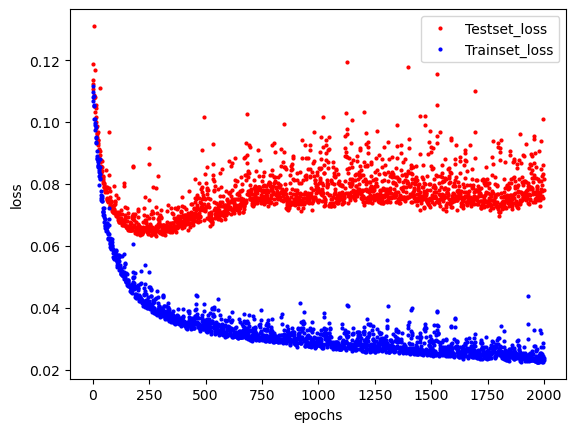

In [13]:
# y_vloss에 테스트셋(여기에서는 검증셋)의 오차를 저장
y_vloss = hist_df['val_loss']
# y_loss에 학습셋의 오차를 저장
y_loss = hist_df['loss']
# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, "o", c = 'red', markersize = 2, label = 'Testset_loss')
plt.plot(x_len, y_loss, "o", c = 'blue', markersize = 2, label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

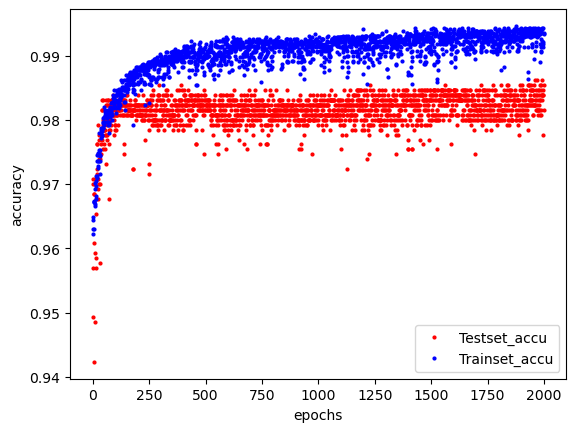

In [15]:
# y_vloss에 테스트셋(여기에서는 검증셋)의 오차를 저장
vaccu = hist_df['val_accuracy']
# y_loss에 학습셋의 오차를 저장
accu = hist_df['accuracy']
# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시
x_len = np.arange(len(y_loss))

plt.plot(x_len, vaccu, "o", c = 'red', markersize = 2, label = 'Testset_accu')
plt.plot(x_len, accu, "o", c = 'blue', markersize = 2, label = 'Trainset_accu')
plt.legend(loc = 'lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### 4. 학습의 자동 중단
- ModelCheckpoint와 함께 사용하여 최적의 모델을 저장

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 학습이 언제 자동 중단될지 설정
# 검증셋의 오차가 20번 이상 낮아지지 않을 경우 학습을 종료
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)

# 최적화 모델이 저장될 폴더와 모델 이름 지정
modelpath = '../data/model/wine_bestmodel.hdf5'

# 최적화 모델을 업데이트하고 저장
# save_best_only 옵션을 True로 지정하여 최고의 모델 하나만 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True)

# 모델 실행
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, validation_split = 0.25, verbose = 1, callbacks = [early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 26ms/step - loss: 0.0233 - accuracy: 0.9941 - val_loss: 0.0762 - val_accuracy: 0.9823
Epoch 2/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0249 - accuracy: 0.9931 - val_loss: 0.0800 - val_accuracy: 0.9846
Epoch 3/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0271 - accuracy: 0.9918 - val_loss: 0.0792 - val_accuracy: 0.9854
Epoch 4/2000


c:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 14ms/step - loss: 0.0246 - accuracy: 0.9938 - val_loss: 0.0840 - val_accuracy: 0.9846
Epoch 5/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0227 - accuracy: 0.9949 - val_loss: 0.0752 - val_accuracy: 0.9831
Epoch 6/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0228 - accuracy: 0.9933 - val_loss: 0.0752 - val_accuracy: 0.9831
Epoch 7/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0233 - accuracy: 0.9944 - val_loss: 0.0780 - val_accuracy: 0.9831
Epoch 8/2000
8/8 [==============================] - 0s 26ms/step - loss: 0.0238 - accuracy: 0.9933 - val_loss: 0.0806 - val_accuracy: 0.9800
Epoch 9/2000
8/8 [==============================] - 0s 24ms/step - loss: 0.0232 - accuracy: 0.9938 - val_loss: 0.0750 - val_accuracy: 0.9823
Epoch 10/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0758 - val_accuracy: 0.9846
Epoch 11/2000
8/8 [======

In [18]:
# 테스트 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy : ', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 0.9892
Test accuracy :  0.989230751991272
